### Marka ugu horeeso data soo gasho 

In [1]:
import tiktoken

In [13]:
with open("raw.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
    
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 30967
Qaabkii Garyaqaan looga soo tarxiilay Mareykanka iyo walwalka uu hadda qabo
"Mahad Maxamud waxaa uu


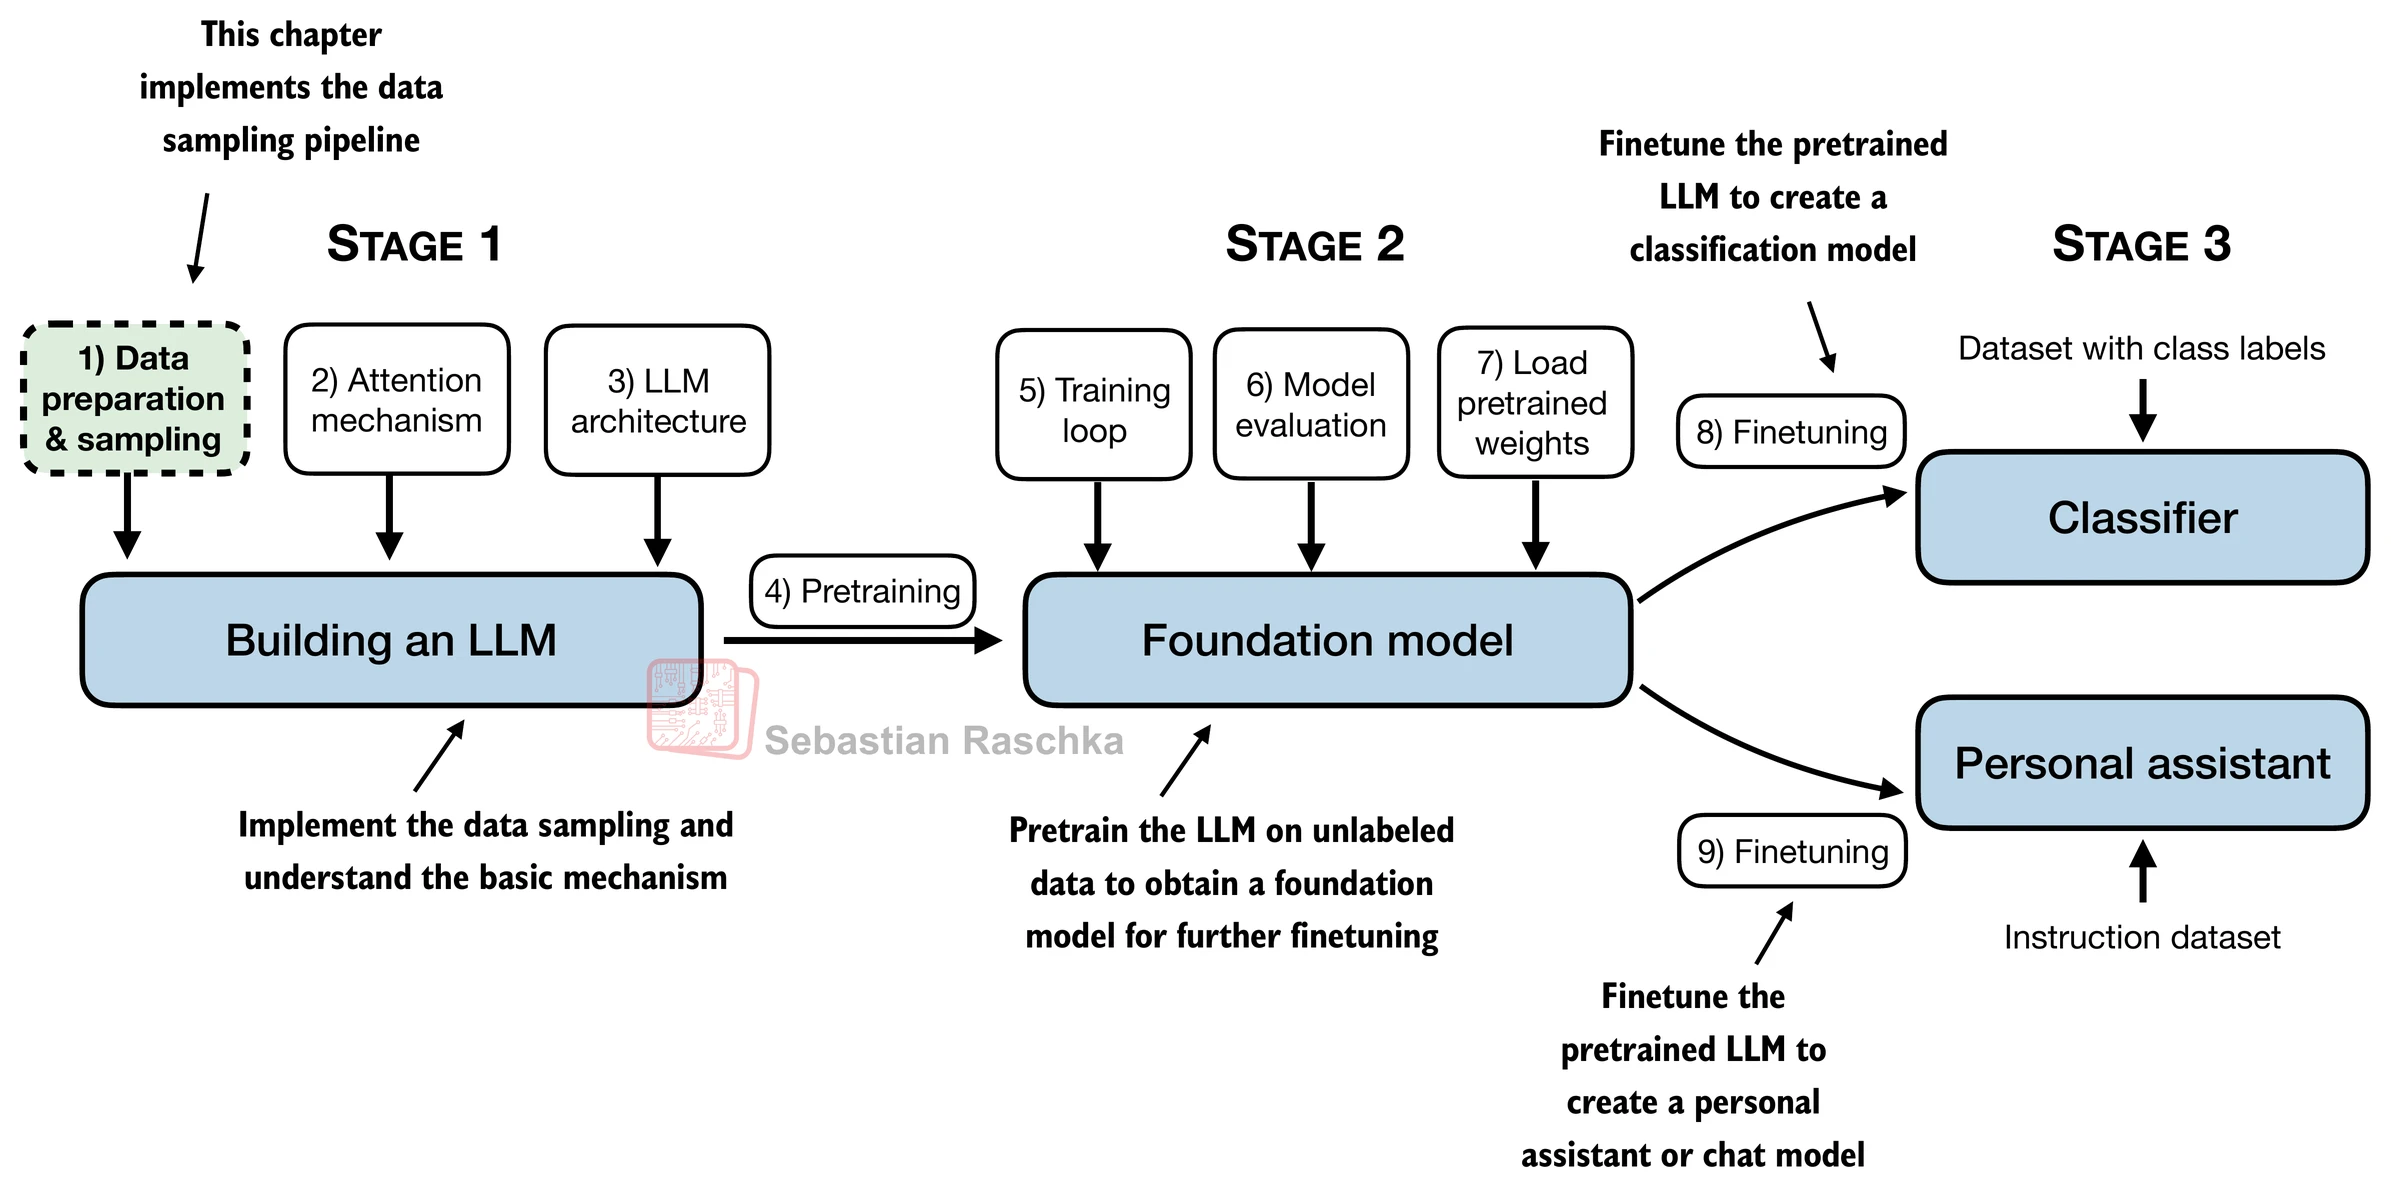

 Tokenize : first split the words using regex

In [16]:
import re

preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['Qaabkii', 'Garyaqaan', 'looga', 'soo', 'tarxiilay', 'Mareykanka', 'iyo', 'walwalka', 'uu', 'hadda', 'qabo', '"', 'Mahad', 'Maxamud', 'waxaa', 'uu', 'si', 'tartiib', 'ah', 'ula', 'qabsanayaa', 'kuleyka', 'iyo', 'xaaladda', 'Muqdisho', 'kadib', 'markii', 'bishii', 'hore', 'laga']


The length of the words all

In [17]:
print(len(preprocessed))

5679


The length of the unique Words only , here are removed the duplicate words in the corpus and the unique words are called in llms vocabs or vocabulary

In [18]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)

1933


WE add the 2 vocabs we call in llms these tokens ---> Special Tokens :
 
1- end of text = tokens that telling us if the line or page is ended 

2- unk = token that telling this word we dont have in our vocab 

In [19]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}
len(vocab.items())

1935

Here we creating our tokenizer from scratch , we use bpe Algrothims and we using Huggingface library that uses this library . 

    more about here :
    1- https://huggingface.co/learn/llm-course/en/chapter6/ 
    2- https://sebastianraschka.com/blog/2025/bpe-from-scratch.
    3- https://tiktokenizer.vercel.app/

In [ ]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers, processors, decoders

tokenizer = Tokenizer(models.BPE())

tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel( 
    add_prefix_space=False
)

trainer = trainers.BpeTrainer(
    vocab_size=1933,
    min_frequency=2,
    special_tokens=["<|endoftext|>"]
)

tokenizer.train(
    files=["raw.txt"],
    trainer=trainer
)

tokenizer.post_processor = processors.ByteLevel(
    trim_offsets=False
)

tokenizer.decoder = decoders.ByteLevel()


text = "Waxaa ku shaqeysan jiray tagaasida"
encoding = tokenizer.encode(text)

print(encoding.tokens)
print(tokenizer.decode(encoding.ids))



### this is saving our tokenizer to a json file 
tokenizer.save("my_bpe_tokenizer.json")

### this wraps our raw tokenizer to GPT2TokenizerFast SO we can use it any gpt model architecture like wise 

from transformers import GPT2TokenizerFast

hf_tokenizer = GPT2TokenizerFast(
    tokenizer_object=tokenizer
)





['Waxaa', 'Ġku', 'Ġshaq', 'eysan', 'Ġjiray', 'Ġtag', 'aasi', 'da']
Waxaa ku shaqeysan jiray tagaasida


d:\Mine\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
hf_tokenizer.save_pretrained("my_bpe_tokenizer")

('my_bpe_tokenizer\\tokenizer_config.json', 'my_bpe_tokenizer\\tokenizer.json')

In [23]:
ibra=hf_tokenizer("Waxaa ku shaqeysan jiray tagaasida")["input_ids"]

In [24]:
hf_tokenizer.decode(ibra)

'Waxaa ku shaqeysan jiray tagaasida'

In [25]:
hf_tokenizer.special_tokens_map

{'bos_token': '<|endoftext|>',
 'eos_token': '<|endoftext|>',
 'unk_token': '<|endoftext|>'}

In [31]:
# hf_tokenizer.special_tokens_map_extended

hf_tokenizer.special_tokens_map
hf_tokenizer.all_special_tokens
hf_tokenizer.all_special_ids

[0]

In [27]:
hf_tokenizer.get_vocab().get("<|endoftext|>")

0

In [28]:
ids = hf_tokenizer.encode("<|endoftext|>")
print(ids)
print(hf_tokenizer.decode(ids))

[0]
<|endoftext|>


In [29]:
hf_tokenizer(
    "Hello",
    add_special_tokens=True
)["input_ids"]

[30, 156, 232]

In [34]:
corpus=("Socdaalku waxay marka hore ku tageen dalka Costa Rica oo ku yaalla Bartamaha Ameerika, ka dibna Senegal oo ku taalla Galbeedka Afrika, ka hor inta aan loo duulin caasimadda Kenya ee Nairobi. Halkaas ayuu Mahad sheegay in jaakaddii lagu xakameynayay lagaga siibay, gacmahana laga xidhay, kadibna laga saaray diyaarad kale oo u safreysay Muqdisho."
"Kadib saddex bilood oo uu ku qaatay xarunta masaafurinta, Mahad wuxuu horey ka aqbalay qaddarkiisa, mana uusan muujin dareen gaar ah markii uu yimid Muqdisho."
"Ka dib toban sano oo kala maqnaansho ah, wuxuu ugu dambayn dib ula midoobay saddex carruur ah oo uu dhalay"
"Ma jiro wax aan ku beddelan lahaa aragtida caruurteyda, toban sano ma aanan arag, ayuu yiri Mahad.")

In [35]:
lengths = [len(tokenizer.encode(t).ids) for t in corpus[:100]]
avg_length = sum(lengths) / len(lengths)
print("Average token length:", avg_length)

Average token length: 1.0


In [36]:
for word in ["Magaalada", "mid", "madaxweyne"]:
    tokens = tokenizer.encode(word).tokens
    print(word, "→", tokens)

Magaalada → ['M', 'ag', 'aalada']
mid → ['mid']
madaxweyne → ['m', 'adaxweyne']


## You can do indepth these :

1-fertility

2-Compression

## Data Loading

####  So Just Now i need to create dataloading , away that i load the data into batches and assign x,y |   so x = the first word and y = the next word --- so the llm are next word prediction models 

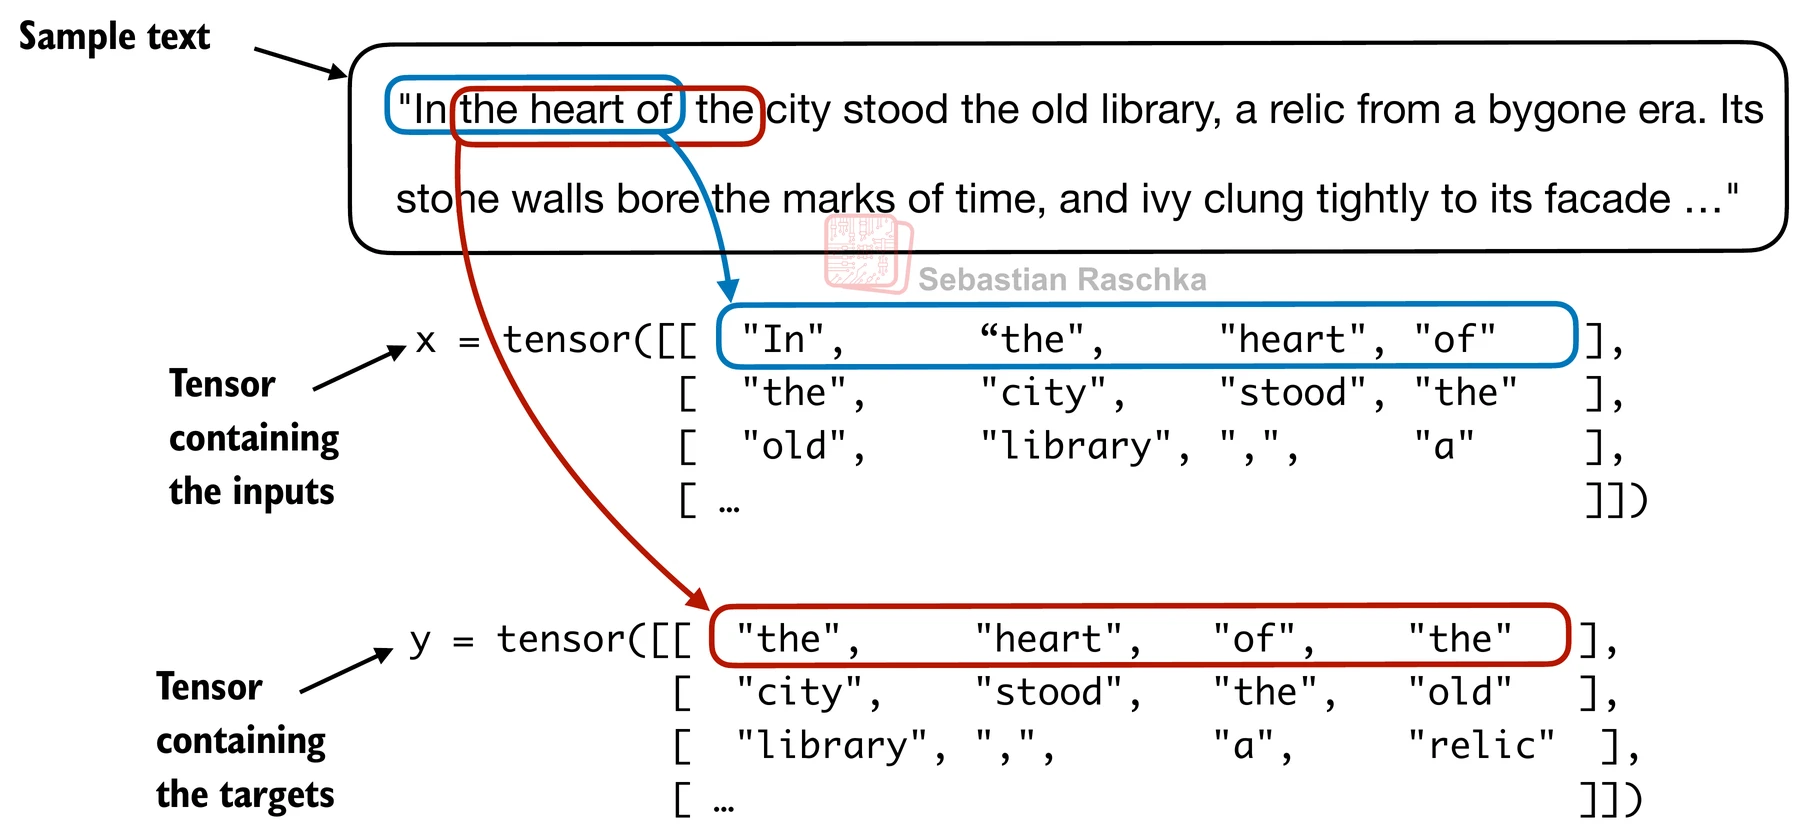

In [ ]:
import torch

In [55]:
import torch
from torch.utils.data import Dataset, DataLoader
import tiktoken
from transformers import AutoTokenizer # Use this for custom JSON tokenizers

MY_TOKENIZER_PATH = "my_bpe_tokenizer"

class GPTDatasetV1(Dataset):
    def __init__(self, txt: str, tokenizer, max_length: int, stride: int):
        # 1. Tokenize once and store as a single tensor to save memory
        self.input_ids = []
        self.target_ids = []
        
        token_ids = tokenizer.encode(txt, add_special_tokens=False )
        
        # 2. Pre-calculate indices rather than storing thousands of separate tensors
        # This is the "Industry Way": don't duplicate data in memory
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self) -> int:
        return len(self.input_ids)

    def __getitem__(self, idx: int):
        return self.input_ids[idx], self.target_ids[idx]

def create_dataloader_v1(
    txt: str, 
    tokenizer_path: str, 
    batch_size: int = 4,
    
    max_length: int = 256, 
    stride: int = 128, 
    shuffle: bool = True, 
    drop_last: bool = True, 
    num_workers: int = 0
) -> DataLoader:
    """Factory function to create a standardized DataLoader."""

    
    
    tokenizer = AutoTokenizer.from_pretrained(MY_TOKENIZER_PATH)
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    
    return DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers,
        pin_memory=torch.cuda.is_available() # Industry standard: speeds up data transfer to GPU
    )

# --- EXECUTION BLOCK ---
if __name__ == "__main__":
    try:
        with open("raw.txt", "r", encoding="utf-8") as f:
            raw_text = f.read()
            
        dataloader = create_dataloader_v1(
            raw_text, batch_size=2, tokenizer_path=MY_TOKENIZER_PATH, max_length=4, stride=1, shuffle=False
        )

        # Iterate professionally
        data_iter = iter(dataloader)
        inputs, targets = next(data_iter)
        
        print(f"Inputs Shape: {inputs.shape}") # [batch_size, max_length]
        print(f"Inputs:\n {inputs}")
        print(f"Targets:\n {targets}")

    except FileNotFoundError:
        print("Error: 'the-verdict.txt' not found. Please ensure the file exists.")

Inputs Shape: torch.Size([2, 4])
Inputs:
 tensor([[1251,  138,  586,  569],
        [ 138,  586,  569,  198]])
Targets:
 tensor([[ 138,  586,  569,  198],
        [ 586,  569,  198, 1166]])


In [ ]:
    # if you using tiktoken  or another tokenizer, you can use it here i am Uploading My own tokeinizer i saved already 


    # def create_dataloader_v1(txt, batch_size=4, max_length=256, 
    #                      stride=128, shuffle=True, drop_last=True,
    #                      num_workers=0):

    # # Initialize the tokenizer
    # tokenizer = tiktoken.get_encoding("gpt2")

    # # Create dataset
    # dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # # Create dataloader
    # dataloader = DataLoader(
    #     dataset,
    #     batch_size=batch_size,
    #     shuffle=shuffle,
    #     drop_last=drop_last,
    #     num_workers=num_workers
    # )

    # return dataloader

## Creating token embeddings  
Usually, the embedding layers are part of the LLM itself and are updated (trained) during model training

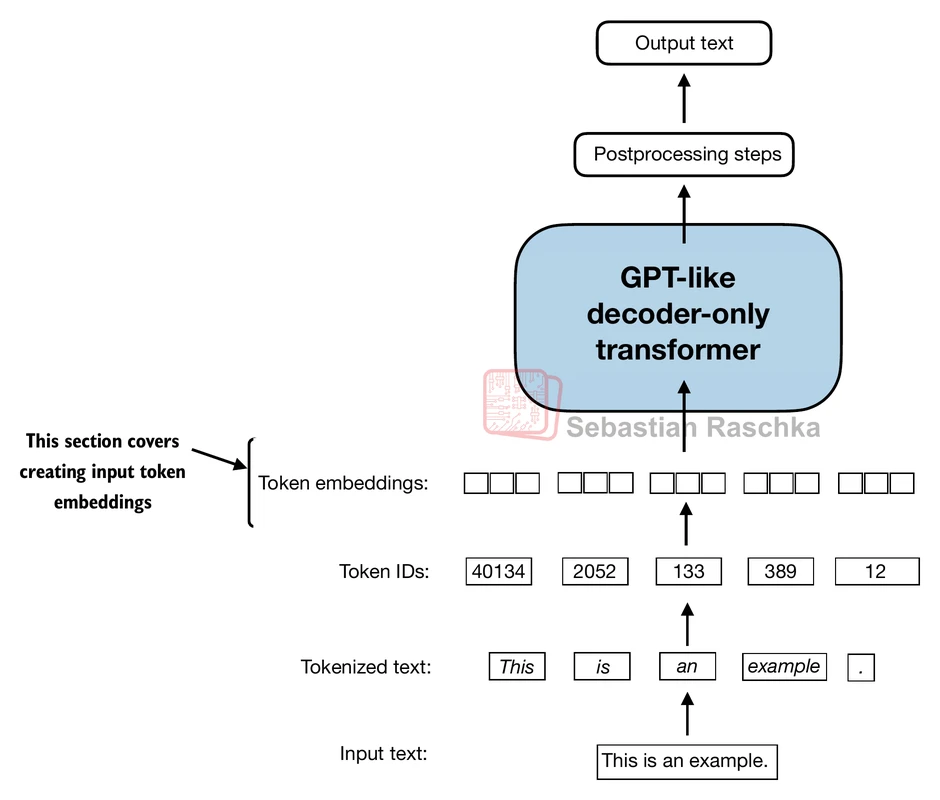

So here we do 3 Tasks :
1. Create Token Embeddings
2. Create Positional Embeddings
3. Create Input Embeddings  that Combine both Token and Positional Embeddings

In [57]:
input_ids = torch.tensor([2, 3, 5, 1])

In [66]:
vocab_size = 6
output_dim = 2

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

print(embedding_layer.weight)

Parameter containing:
tensor([[-0.1115,  0.1204],
        [-0.3696, -0.2404],
        [-1.1969,  0.2093],
        [-0.9724, -0.7550],
        [ 0.3239, -0.1085],
        [ 0.2103, -0.3908]], requires_grad=True)


In [ ]:
#convert a token with id 3 into a 3-dimensional vector

print(embedding_layer(torch.tensor([3])))

tensor([[ 0.2692, -0.0770, -1.0205, -0.1690,  0.9178]],
       grad_fn=<EmbeddingBackward0>)


In [73]:
print(embedding_layer(input_ids))

tensor([[-1.1969,  0.2093],
        [-0.9724, -0.7550],
        [ 0.2103, -0.3908],
        [-0.3696, -0.2404]], grad_fn=<EmbeddingBackward0>)


    Sample data 

In [90]:
vocab_size = 50257
output_dim = 256
max_length = 4
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

    Token Embeddings

In [84]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)


torch.Size([8, 4, 256])


In [85]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)


    Positional Embeddings

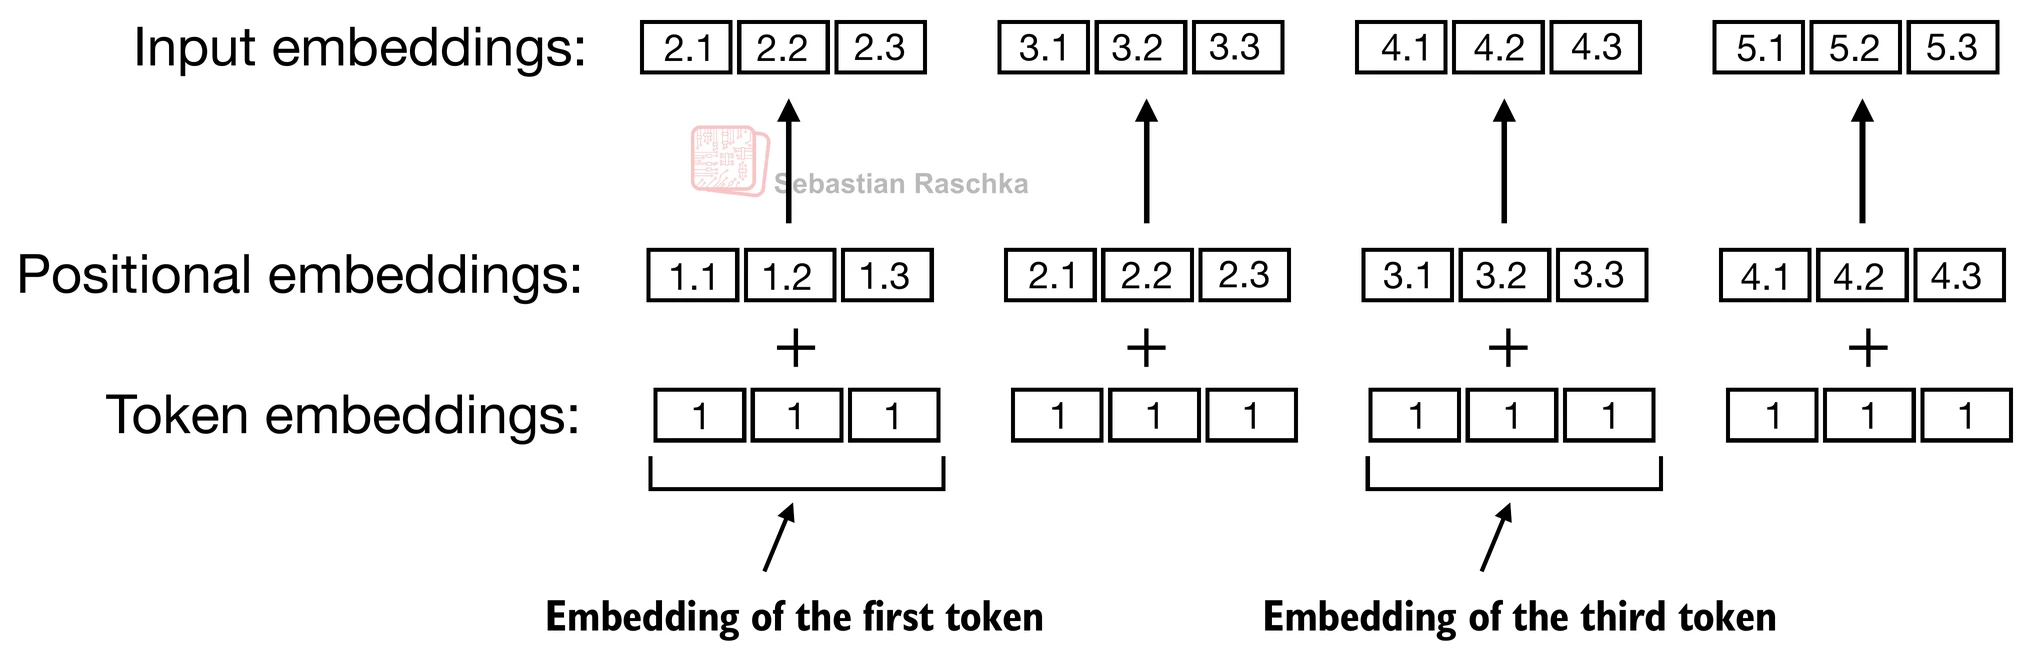

In [ ]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

print(pos_embeddings)

torch.Size([4, 256])
tensor([[ 1.8998, -0.1494, -2.0049,  ...,  1.0383, -1.2938,  0.7926],
        [-2.1353, -0.5646,  0.2844,  ..., -2.3879, -0.5039,  0.7396],
        [ 0.0610, -0.2660,  0.9397,  ...,  0.3787,  1.6935,  0.4648],
        [-1.3003, -0.7067,  0.8994,  ...,  2.4862,  1.2130,  0.0078]],
       grad_fn=<EmbeddingBackward0>)


    Input Embeddings

In [ ]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

print(input_embeddings)

torch.Size([8, 4, 256])
tensor([[[ 2.5717e+00,  8.0096e-01, -2.2855e+00,  ..., -4.3199e-01,
          -1.9618e+00, -1.7114e+00],
         [-1.9849e+00, -2.1547e+00,  5.2540e-01,  ..., -1.6044e+00,
          -1.8542e-01,  2.1969e-01],
         [-1.7315e-01,  9.6205e-01,  4.3792e-01,  ...,  2.7404e+00,
           9.6355e-01,  5.1059e-01],
         [-2.4351e+00,  1.1958e-01,  6.7790e-01,  ...,  3.1735e+00,
           2.7497e+00, -2.0016e-03]],

        [[ 1.2721e+00, -6.8631e-01, -8.8862e-01,  ...,  2.0391e+00,
          -1.7985e+00,  2.1519e+00],
         [-1.0115e+00, -6.3675e-01, -5.4962e-01,  ..., -3.2598e+00,
           4.0652e-02,  6.8030e-01],
         [ 8.7938e-01, -1.2228e+00,  8.7592e-01,  ...,  3.2935e-02,
           1.6927e+00,  6.4832e-01],
         [-1.2008e+00, -1.7446e+00,  2.4663e+00,  ...,  4.9096e-01,
           2.2222e+00, -2.1050e+00]],

        [[ 2.1969e+00,  2.4358e-01, -2.2798e+00,  ...,  5.9493e-01,
          -1.3737e-02, -4.3466e-01],
         [-2.6116e+00, -2.4

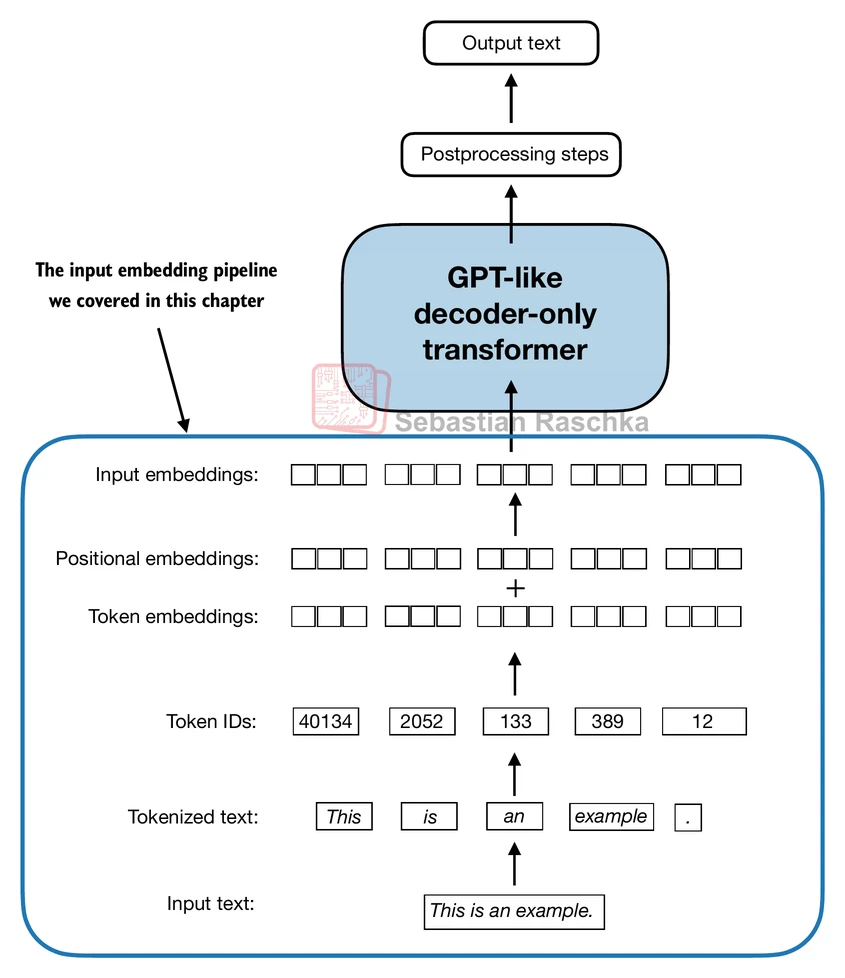